In [1]:
# Here are our imports (press shift+enter)
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

In [2]:
import torch

def plot_function(func, title=None, color='red', x_range=(-2, 2), ylim =None, num_points=500):
    """
    Plots a given function with a title.

    Parameters:
    - func: callable, the function to plot (e.g., lambda x: x**2)
    - title: str, title of the plot
    - x_range: tuple, (min, max) range for x-values
    - num_points: int, number of points to sample
    """
    x = torch.linspace(x_range[0], x_range[1], num_points)
    y = func(x)
    
    plt.plot(x, y, color=color, label=title)
    if title:
        plt.title(title, fontsize=14)
    if ylim is not None:
        plt.ylim(ylim)

# An intro to Deep Learning 

## The classic neural network 

<center><img src="mlp.png" width="720"/></center>

## The artificial neuron

<center><img src="neuron.jpg" width="720"/></center>

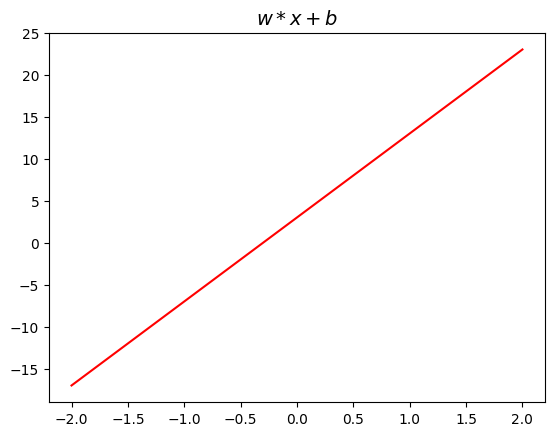

In [3]:
from functools import partial

def neuron(w ,b,x): return w*x+b
def make_neuron(w,b): return partial(neuron,w,b) 
f = make_neuron(10,3)
plot_function(f,"$w*x +b$")

Let's imagine we have some data...

In [4]:
from numpy.random import normal,seed,uniform

np.random.seed(42) 
def noise(x,scale): return normal(scale=scale, size=x.shape)
def add_noise(x,mult,add): return x * (1+noise(x,mult)) + noise(x,add)

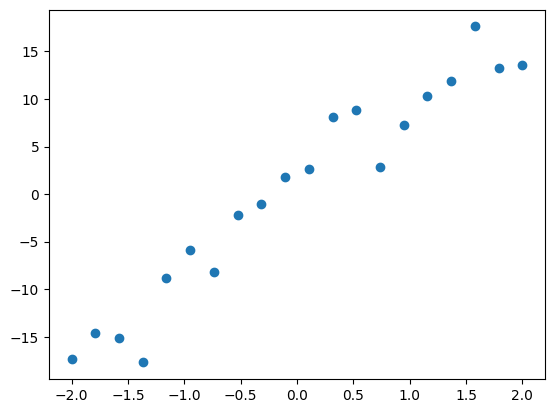

In [5]:
x = torch.linspace(-2,2, steps=20)[:None]
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x,y)

In [6]:
from ipywidgets import interact
@interact(w = 3.0, b=-1.0)
def plot_lin(w,b):
    plt.scatter(x,y)
    plot_function(make_neuron(w,b),ylim=(-15,15))

interactive(children=(FloatSlider(value=3.0, description='w', max=9.0, min=-3.0), FloatSlider(value=-1.0, desc…

Let's be a little bit rigorous

In [7]:
def mean_squared_error(y_pred, y_true):  return ((y_pred-y_true)**2).mean()

In [8]:
@interact(w = 5.0, b=1.0)
def plot_lin(w,b):   
    plt.scatter(x,y)
    f = make_neuron(w,b)
    loss = mean_squared_error(f(x),y)
    plot_function(f,ylim=(-15,15),title=f"MSE Loss: {loss}")

interactive(children=(FloatSlider(value=5.0, description='w', max=15.0, min=-5.0), FloatSlider(value=1.0, desc…

## What about other type of data ?

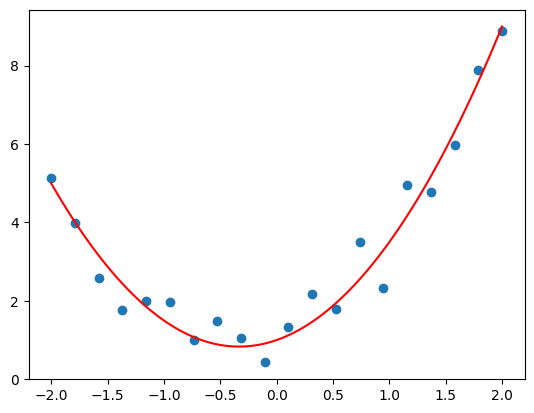

In [9]:
def quad(a,b,c,x): return a*x**2 + b*x + c
def make_quad(a,b,c): return partial(quad,a,b,c)

g = make_quad(1.5,1,1)
yg = add_noise(g(x), 0.1, 0.5)
plt.scatter(x,yg)
plot_function(g)

In [10]:
@interact(w = 5.0, b=1.0)
def plot_lin(w,b):   
    plt.scatter(x,yg)
    f = make_neuron(w,b)
    loss = mean_squared_error(f(x),yg)
    plot_function(f,ylim=(0,10),title=f"MSE Loss: {loss}")

interactive(children=(FloatSlider(value=5.0, description='w', max=15.0, min=-5.0), FloatSlider(value=1.0, desc…

## Time for the activation function to play a role ?
<center><img src="neuron.jpg" width="720"/></center>

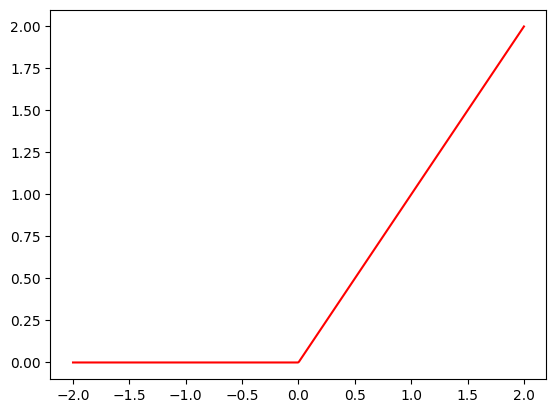

In [11]:
def relu(x): return torch.clip(x,0)
plot_function(relu) 

In [12]:
def relu_neuron(w,b,x): return relu(w*x+b)
def make_relu_neuron(w,b): return partial(relu_neuron,w,b)

@interact(w=1.5, b=1.5)
def plot_neuron(w,b):
    plot_function(make_relu_neuron(w,b), ylim=(-1,4))

interactive(children=(FloatSlider(value=1.5, description='w', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [13]:
def two_neurons(w1,b1,w2,b2,x):
    f1 = make_relu_neuron(w1,b1)
    f2 = make_relu_neuron(w2,b2)
    return f1(x)+f2(x)
@interact(w1=1.5, b1=1.5,w2=1.5, b2=1.5)
def plot_two_neurons(w1,b1,w2,b2):
    plot_function(partial(two_neurons,w1,b1,w2,b2), ylim=(-1,10))

interactive(children=(FloatSlider(value=1.5, description='w1', max=4.5, min=-1.5), FloatSlider(value=1.5, desc…

Basically what we built is this

<center><img src="2neurons.png" width="720"/></center>

## "Jamais 2 sans 3"

In [14]:
def three_neurons(w1,b1,w2,b2,w3,b3,x):
    f1 = make_relu_neuron(w1,b1)
    f2 = make_relu_neuron(w2,b2)
    f3 = make_relu_neuron(w3,b3)
    return f1(x)+f2(x)+f3(x)
@interact(w1=1.5, b1=1.5,w2=5.5, b2=1.5, w3=10.5, b3=1.5)
def plot_three_neurons(w1,b1,w2,b2,w3,b3):
    plot_function(partial(three_neurons,w1,b1,w2,b2,w3,b3),ylim=(-20,20))

interactive(children=(FloatSlider(value=1.5, description='w1', max=4.5, min=-1.5), FloatSlider(value=1.5, desc…

## Now we can try to fit our model to some data

In [ ]:
def plot_model_and_data(params, data):
    plt.scatter(x,data)
    f = partial(three_neurons,*params)
    plot_function(f,title=f"Loss {mean_squared_error(f(x),yg)}", ylim= (-2,10))

@interact(w1=1.5, b1=1.5,w2=1.5, b2=1.5, w3=1.5, b3=1.5)
def plot_three_neurons_and_data(w1,b1,w2,b2,w3,b3):
    return plot_model_and_data([w1,b1,w2,b2,w3,b3], yg)

First let's make our code manage n neurons instead of just 2 or 3!

In [15]:
def n_neurons(params,x):
    neurons = []
    for i in range(0, len(params), 2):
        w = params[i]
        b = params[i + 1]
        neurons.append(make_relu_neuron(w, b))
    return sum(neuron(x) for neuron in neurons)

def plot_model_and_data(params, data):
    plt.scatter(x,data)
    f = partial(n_neurons,params)
    plot_function(f,title=f"Loss {mean_squared_error(f(x),yg)}", ylim= (-2,10))


In [16]:
def loss_fn(params, acts):
    f = partial(n_neurons, params)
    return mean_squared_error(f(x),acts)

In [56]:
def init_params(neurons_count):
    params = torch.rand(neurons_count*2)*5.0
    params.requires_grad_()
    return params

params = init_params(neurons_count=5)
params

tensor([0.1271, 3.4638, 0.1188, 4.2418, 2.2358, 3.2913, 0.8908, 1.0733, 2.4057,
        0.5848], requires_grad=True)

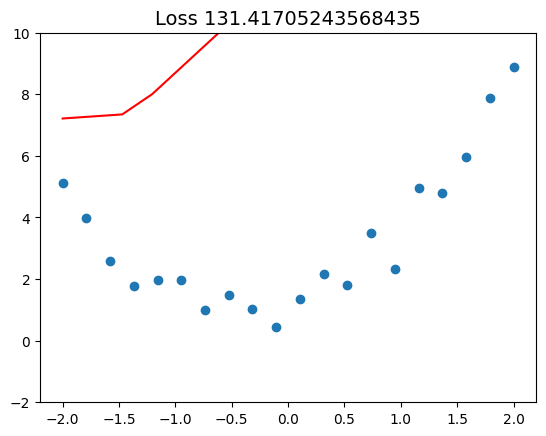

In [57]:
plot_model_and_data(params.detach().numpy(), yg)

We could try to adjust the parameters by hand but this will not scale at all with larger models...

So let's automate the search for the best parameters!

In [58]:
loss = loss_fn(params, yg)
loss

tensor(131.4171, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [59]:
loss.backward()

In [60]:
params.grad

tensor([10.3661, 21.1748, 10.3661, 21.1748, 12.1186, 20.1642, 12.9166, 19.5810,
        15.6972, 15.5366])

In [61]:
with torch.no_grad():
    params -= params.grad*0.01
    loss = loss_fn(params,yg) 
    params.grad.zero_()

print(f"loss={loss:.2f}")

loss=105.88


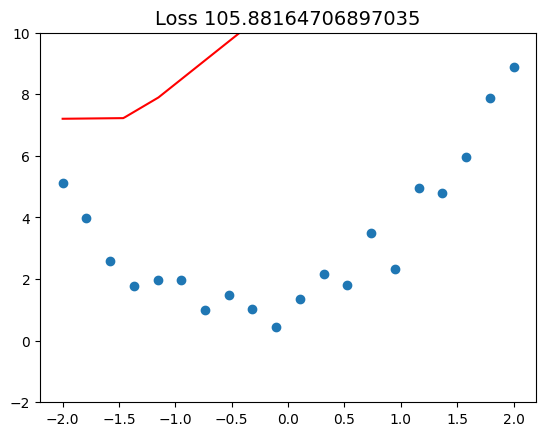

In [62]:
p = params.detach().numpy()
plot_model_and_data(p, yg) 

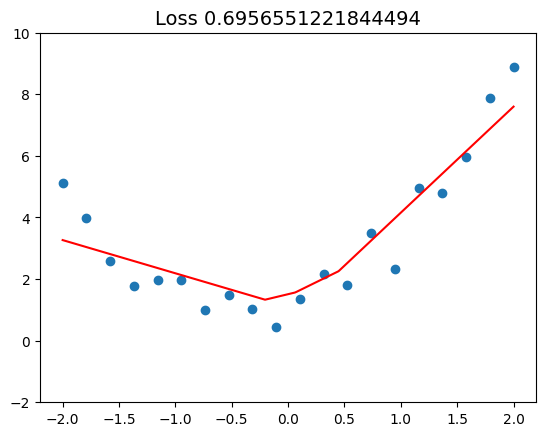

In [80]:
loss = loss_fn(params,yg)
loss.backward()
with torch.no_grad():
    params -= params.grad*0.1
    params.grad.zero_()
    loss = loss_fn(params,yg)
p = params.detach().numpy()
plot_model_and_data(p,yg)


## The "mini" model we trained

<center><img src="minimodel.png" width="400"/></center>

<center><img src="mlp.png" width="720"/></center>

https://xnought.github.io/backprop-explainer/

# And that's it for now!